Importing neceassary libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

Merging 12 months data into single csv

In [2]:
files = [file for file in os.listdir('./Sales_Data')]
all_month_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_month_data = pd.concat([all_month_data,df])
all_month_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
all_month_data = all_month_data.drop(labels=1, axis=0)

In [4]:
all_month_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


Save the merged data

In [5]:
all_month_data.to_csv("all_data.csv",index= False)

# Now working on merged data

In [6]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


# Cleaning data

In [7]:
data_null = all_data[all_data.isna().any(axis=1 )]
data_null.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
355,NaN,NaN,NaN,NaN,NaN,NaN
734,NaN,NaN,NaN,NaN,NaN,NaN
1432,NaN,NaN,NaN,NaN,NaN,NaN
1552,NaN,NaN,NaN,NaN,NaN,NaN
1570,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
all_data = all_data.dropna(how='all')

# Delecting or from data

In [9]:
all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]

# Simplifing the data buy adding more columns

In [10]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


# Converting columns to correct type

In [11]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185939 entries, 0 to 186837
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185939 non-null  object
 1   Product           185939 non-null  object
 2   Quantity Ordered  185939 non-null  object
 3   Price Each        185939 non-null  object
 4   Order Date        185939 non-null  object
 5   Purchase Address  185939 non-null  object
 6   Month             185939 non-null  int32 
dtypes: int32(1), object(6)
memory usage: 10.6+ MB


In [12]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

# Calculating sales

In [13]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


# Sales wrt months

In [14]:
results = all_data.groupby('Month').sum()

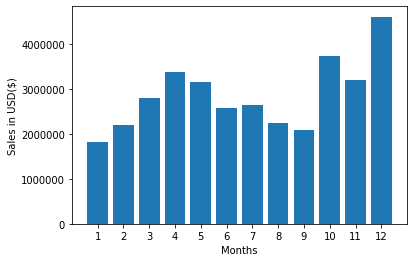

In [15]:
months = range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel("Sales in USD($)")
plt.xlabel("Months")
plt.savefig('salepermonth.png', bbox_inches='tight')

Adding columns for cities

In [16]:
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]
all_data['Cities'] = all_data['Purchase Address'].apply(lambda x:get_city(x)+'(' + get_state(x)+')')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX)
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA)
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA)
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)


# Sales wrt cities

In [17]:
results = all_data.groupby('Cities').sum()
results

,Quantity Ordered,Price Each,Month,Sales
Cities,,,,
Atlanta(GA),16602,2.779908e+06,104794,2.795499e+06
Austin(TX),11148,1.809835e+06,69806,1.819519e+06
Boston(MA),22528,3.637410e+06,141112,3.661642e+06
Dallas(TX),16728,2.752524e+06,104607,2.767872e+06
Los Angeles(CA),33288,5.421045e+06,208315,5.452181e+06
New York City(NY),27931,4.634771e+06,175729,4.663717e+06
Portland(ME),2750,4.471893e+05,17144,4.497583e+05
Portland(OR),11302,1.860543e+06,70620,1.870717e+06
San Francisco(CA),50237,8.209758e+06,315512,8.260500e+06


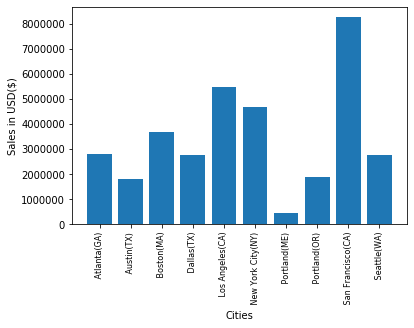

In [18]:
cities =results.index
plt.bar(cities,results['Sales'])
plt.xticks(cities,rotation='vertical',size=8)
plt.ylabel("Sales in USD($)")
plt.xlabel("Cities")
plt.savefig('salesincities.png', bbox_inches='tight')

# What time should the ads be shown to max the sales

In [19]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [20]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX)
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA)
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA)
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)


In [21]:
all_data["Hour"] = all_data['Order Date'].dt.hour
all_data["Minute"] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA),22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),9,27


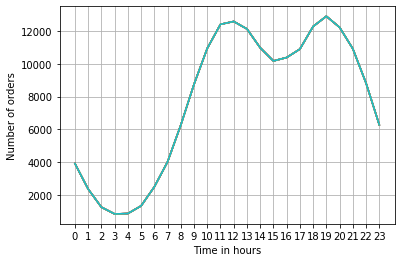

In [22]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours,all_data.groupby('Hour').count())
plt.xticks(hours)
plt.grid()
plt.ylabel("Number of orders")
plt.xlabel("Time in hours")
plt.savefig('oderperhour.png', bbox_inches='tight')

# What product is most offent sold together

In [23]:
df = all_data[all_data['Order ID'].duplicated(keep= False)]
df['Grouped'] = all_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID','Grouped']].drop_duplicates()

C:\Users\shekh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
df.head()

,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [25]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
for i, j in count.most_common(5):
    print(i,j)

('iPhone', 'Lightning Charging Cable') 1004
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361


# What product most sold and why

In [26]:
product_data = all_data.groupby('Product').sum()

In [27]:
product_data['Price Each'] = product_data["Price Each"] / product_data['Quantity Ordered']

In [28]:
product_data

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Product,,,,,,
20in Monitor,4129,109.244124,29336,454148.71,58764,122252
27in 4K Gaming Monitor,6243,389.115443,44430,2434707.57,90899,184305
27in FHD Monitor,7550,149.135752,52558,1132424.50,107540,219948
34in Ultrawide Monitor,6199,378.886625,43304,2355558.01,89076,183480
AA Batteries (4-pack),27633,2.859190,145551,106110.72,298321,608972
AAA Batteries (4-pack),31017,1.989767,146370,92740.83,297332,612113
Apple Airpods Headphones,15661,148.927272,109477,2349150.00,223304,455570
Bose SoundSport Headphones,13456,99.009123,94105,1345465.44,192430,392592
Flatscreen TV,4818,298.816936,34217,1445400.00,68807,142734


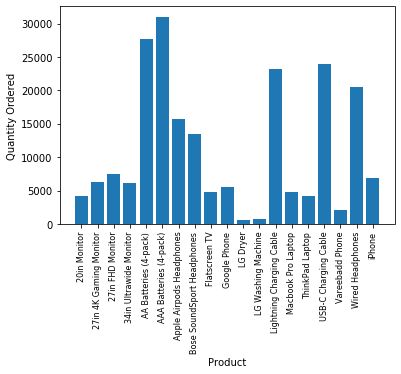

In [29]:
plt.bar(product_data.index,product_data['Quantity Ordered'])
product = product_data.index
plt.xticks(product,rotation='vertical',size=8)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.savefig('quantity.png', bbox_inches='tight')

In [30]:
prices = all_data.groupby('Product').mean()['Price Each']

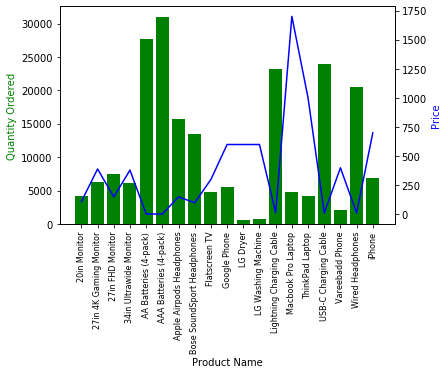

In [31]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product,product_data['Quantity Ordered'],color='g')
ax2.plot(product, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price', color='b')
ax1.set_xticklabels(product,rotation='vertical',size=8)
plt.savefig('product.png', bbox_inches='tight')